In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import (
    shapiro,
    levene,
    ttest_ind,
    mannwhitneyu,
    normaltest,
    median_test,
    t,
)
from cliffs_delta import cliffs_delta
import constants_pynb as const
from collections import Counter

In [2]:
metric_selection = [const.METRIC_NAME, const.TIMESTAP, const.METRIC_VALUE]
metric_row_selection = [
    const.DATA_SENT,
    const.DATA_RECEIVED,
    const.RESPONSE_SIZE,
    const.REPONSE_SIZE,
    const.RESPONSE_TIME,
    const.HTTP_REQ_DURATION,
]
metric_selection_pods = [const.PKG, const.OTHER, const.DRAM, const.GPU]

# Load All Reports


In [3]:
# Create User
## Normal Report
json_create_user_1 = pd.read_csv(
    const.JSON_CREATE_USER_REPORT_PATH_1, usecols=metric_selection
)
json_create_user_1 = json_create_user_1[
    json_create_user_1[const.METRIC_NAME].isin(metric_row_selection)
]

json_create_user_2 = pd.read_csv(
    const.JSON_CREATE_USER_REPORT_PATH_2, usecols=metric_selection
)
json_create_user_2 = json_create_user_2[
    json_create_user_2[const.METRIC_NAME].isin(metric_row_selection)
]

json_create_user_3 = pd.read_csv(
    const.JSON_CREATE_USER_REPORT_PATH_3, usecols=metric_selection
)
json_create_user_3 = json_create_user_3[
    json_create_user_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
json_create_user_pod_1 = pd.read_csv(
    const.JSON_CREATE_USER_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
json_create_user_pod_2 = pd.read_csv(
    const.JSON_CREATE_USER_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
json_create_user_pod_3 = pd.read_csv(
    const.JSON_CREATE_USER_POD_REPORT_PATH_3, usecols=metric_selection_pods
)

# Get all Users
## Normal Report
json_get_all_users_1 = pd.read_csv(
    const.JSON_GET_ALL_USERS_REPORT_PATH_1, usecols=metric_selection
)
json_get_all_users_1 = json_get_all_users_1[
    json_get_all_users_1[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_all_users_2 = pd.read_csv(
    const.JSON_GET_ALL_USERS_REPORT_PATH_2, usecols=metric_selection
)
json_get_all_users_2 = json_get_all_users_2[
    json_get_all_users_2[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_all_users_3 = pd.read_csv(
    const.JSON_GET_ALL_USERS_REPORT_PATH_3, usecols=metric_selection
)
json_get_all_users_3 = json_get_all_users_3[
    json_get_all_users_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
json_get_all_users_pod_1 = pd.read_csv(
    const.JSON_GET_ALL_USERS_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
json_get_all_users_pod_2 = pd.read_csv(
    const.JSON_GET_ALL_USERS_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
json_get_all_users_pod_3 = pd.read_csv(
    const.JSON_GET_ALL_USERS_POD_REPORT_PATH_3, usecols=metric_selection_pods
)
# Get User by ID
## Normal Report
json_get_user_id_1 = pd.read_csv(
    const.JSON_GET_USER_ID_REPORT_PATH_1, usecols=metric_selection
)
json_get_user_id_1 = json_get_user_id_1[
    json_get_user_id_1[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_user_id_2 = pd.read_csv(
    const.JSON_GET_USER_ID_REPORT_PATH_2, usecols=metric_selection
)
json_get_user_id_2 = json_get_user_id_2[
    json_get_user_id_2[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_user_id_3 = pd.read_csv(
    const.JSON_GET_USER_ID_REPORT_PATH_3, usecols=metric_selection
)
json_get_user_id_3 = json_get_user_id_3[
    json_get_user_id_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
json_get_user_id_pod_1 = pd.read_csv(
    const.JSON_GET_USER_ID_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
json_get_user_id_pod_2 = pd.read_csv(
    const.JSON_GET_USER_ID_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
json_get_user_id_pod_3 = pd.read_csv(
    const.JSON_GET_USER_ID_POD_REPORT_PATH_3, usecols=metric_selection_pods
)
# Get all Products entities
## Normal Report
json_get_all_product_entities_1 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_1, usecols=metric_selection
)
json_get_all_product_entities_1 = json_get_all_product_entities_1[
    json_get_all_product_entities_1[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_all_product_entities_2 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_2, usecols=metric_selection
)
json_get_all_product_entities_2 = json_get_all_product_entities_2[
    json_get_all_product_entities_2[const.METRIC_NAME].isin(metric_row_selection)
]

json_get_all_product_entities_3 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_3, usecols=metric_selection
)
json_get_all_product_entities_3 = json_get_all_product_entities_3[
    json_get_all_product_entities_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
json_get_all_product_entities_pod_1 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
json_get_all_product_entities_pod_2 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
json_get_all_product_entities_pod_3 = pd.read_csv(
    const.JSON_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_3, usecols=metric_selection_pods
)

# Create User
## Normal Report
protobuf_create_user_1 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_REPORT_PATH_1, usecols=metric_selection
)
protobuf_create_user_1 = protobuf_create_user_1[
    protobuf_create_user_1[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_create_user_2 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_REPORT_PATH_2, usecols=metric_selection
)
protobuf_create_user_2 = protobuf_create_user_2[
    protobuf_create_user_2[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_create_user_3 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_REPORT_PATH_3, usecols=metric_selection
)
protobuf_create_user_3 = protobuf_create_user_3[
    protobuf_create_user_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
protobuf_create_user_pod_1 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
protobuf_create_user_pod_2 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
protobuf_create_user_pod_3 = pd.read_csv(
    const.PROTOBUF_CREATE_USER_POD_REPORT_PATH_3, usecols=metric_selection_pods
)

# Get all Users
## Normal Report
protobuf_get_all_users_1 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_REPORT_PATH_1, usecols=metric_selection
)
protobuf_get_all_users_1 = protobuf_get_all_users_1[
    protobuf_get_all_users_1[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_all_users_2 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_REPORT_PATH_2, usecols=metric_selection
)
protobuf_get_all_users_2 = protobuf_get_all_users_2[
    protobuf_get_all_users_2[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_all_users_3 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_REPORT_PATH_3, usecols=metric_selection
)
protobuf_get_all_users_3 = protobuf_get_all_users_3[
    protobuf_get_all_users_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
protobuf_get_all_users_pod_1 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
protobuf_get_all_users_pod_2 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
protobuf_get_all_users_pod_3 = pd.read_csv(
    const.PROTOBUF_GET_ALL_USERS_POD_REPORT_PATH_3, usecols=metric_selection_pods
)
# Get User by ID
## Normal Report
protobuf_get_user_id_1 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_REPORT_PATH_1, usecols=metric_selection
)
protobuf_get_user_id_1 = protobuf_get_user_id_1[
    protobuf_get_user_id_1[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_user_id_2 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_REPORT_PATH_2, usecols=metric_selection
)
protobuf_get_user_id_2 = protobuf_get_user_id_2[
    protobuf_get_user_id_2[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_user_id_3 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_REPORT_PATH_3, usecols=metric_selection
)
protobuf_get_user_id_3 = protobuf_get_user_id_3[
    protobuf_get_user_id_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
protobuf_get_user_id_pod_1 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_POD_REPORT_PATH_1, usecols=metric_selection_pods
)
protobuf_get_user_id_pod_2 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_POD_REPORT_PATH_2, usecols=metric_selection_pods
)
protobuf_get_user_id_pod_3 = pd.read_csv(
    const.PROTOBUF_GET_USER_ID_POD_REPORT_PATH_3, usecols=metric_selection_pods
)

# Get all Products entities
## Normal Report
protobuf_get_all_product_entities_1 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_1, usecols=metric_selection
)
protobuf_get_all_product_entities_1 = protobuf_get_all_product_entities_1[
    protobuf_get_all_product_entities_1[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_all_product_entities_2 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_2, usecols=metric_selection
)
protobuf_get_all_product_entities_2 = protobuf_get_all_product_entities_2[
    protobuf_get_all_product_entities_2[const.METRIC_NAME].isin(metric_row_selection)
]

protobuf_get_all_product_entities_3 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_REPORT_PATH_3, usecols=metric_selection
)
protobuf_get_all_product_entities_3 = protobuf_get_all_product_entities_3[
    protobuf_get_all_product_entities_3[const.METRIC_NAME].isin(metric_row_selection)
]

## Pod Report
protobuf_get_all_product_entities_pod_1 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_1,
    usecols=metric_selection_pods,
)
protobuf_get_all_product_entities_pod_2 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_2,
    usecols=metric_selection_pods,
)
protobuf_get_all_product_entities_pod_3 = pd.read_csv(
    const.PROTOBUF_GET_ALL_PRODUCT_ENTITIES_POD_REPORT_PATH_3,
    usecols=metric_selection_pods,
)

## Hypothesis Testing


### Initialize constants and table data


In [4]:
endpoints = ["create_user", "get_all_users", "get_user_id", "get_all_product_entities"]


def calculate_throughput(timestamps):
    timestamp_counts = Counter(timestamps)
    throughput_array = np.zeros(len(timestamps))

    for i, ts in enumerate(timestamps):
        throughput_array[i] = timestamp_counts[ts]

    # Calculate mean throughput
    mean_throughput = round(np.mean(throughput_array), 2)
    median_throughput = round(np.median(throughput_array), 2)
    return throughput_array, mean_throughput, median_throughput


def extract_response_times(df, metric_col, value_col, target_metric):
    return df[df[metric_col] == target_metric][value_col].values


def extract_energy_consumption(df, columns_names):
    combined_list = []
    for column in columns_names:
        combined_list.extend(df[column].values)
    return combined_list


json_all_response_times = np.concatenate(
    [
        extract_response_times(
            df, const.METRIC_NAME, const.METRIC_VALUE, const.RESPONSE_TIME
        )
        for df in [
            json_create_user_1,
            json_create_user_2,
            json_create_user_3,
            json_get_all_users_1,
            json_get_all_users_2,
            json_get_all_users_3,
            json_get_user_id_1,
            json_get_user_id_2,
            json_get_user_id_3,
            json_get_all_product_entities_1,
            json_get_all_product_entities_2,
            json_get_all_product_entities_3,
        ]
    ]
)

protobuf_all_response_times = np.concatenate(
    [
        extract_response_times(
            df, const.METRIC_NAME, const.METRIC_VALUE, const.RESPONSE_TIME
        )
        for df in [
            protobuf_create_user_1,
            protobuf_create_user_2,
            protobuf_create_user_3,
            protobuf_get_all_users_1,
            protobuf_get_all_users_2,
            protobuf_get_all_users_3,
            protobuf_get_user_id_1,
            protobuf_get_user_id_2,
            protobuf_get_user_id_3,
            protobuf_get_all_product_entities_1,
            protobuf_get_all_product_entities_2,
            protobuf_get_all_product_entities_3,
        ]
    ]
)

json_reports = [
    [json_create_user_1, json_create_user_2, json_create_user_3],
    [json_get_all_users_1, json_get_all_users_2, json_get_all_users_3],
    [json_get_user_id_1, json_get_user_id_2, json_get_user_id_3],
    [
        json_get_all_product_entities_1,
        json_get_all_product_entities_2,
        json_get_all_product_entities_3,
    ],
]

protobuf_reports = [
    [protobuf_create_user_1, protobuf_create_user_2, protobuf_create_user_3],
    [protobuf_get_all_users_1, protobuf_get_all_users_2, protobuf_get_all_users_3],
    [protobuf_get_user_id_1, protobuf_get_user_id_2, protobuf_get_user_id_3],
    [
        protobuf_get_all_product_entities_1,
        protobuf_get_all_product_entities_2,
        protobuf_get_all_product_entities_3,
    ],
]


json_all_pod_reports = np.concatenate(
    [
        extract_energy_consumption(df, [const.PKG, const.OTHER, const.DRAM, const.GPU])
        for df in [
            json_create_user_pod_1,
            json_create_user_pod_2,
            json_create_user_pod_3,
            json_get_all_users_pod_1,
            json_get_all_users_pod_2,
            json_get_all_users_pod_3,
            json_get_user_id_pod_1,
            json_get_user_id_pod_2,
            json_get_user_id_pod_3,
            json_get_all_product_entities_pod_1,
            json_get_all_product_entities_pod_2,
            json_get_all_product_entities_pod_3,
        ]
    ]
)

protobuf_all_pod_reports = np.concatenate(
    [
        extract_energy_consumption(df, [const.PKG, const.OTHER, const.DRAM, const.GPU])
        for df in [
            protobuf_create_user_pod_1,
            protobuf_create_user_pod_2,
            protobuf_create_user_pod_3,
            protobuf_get_all_users_pod_1,
            protobuf_get_all_users_pod_2,
            protobuf_get_all_users_pod_3,
            protobuf_get_user_id_pod_1,
            protobuf_get_user_id_pod_2,
            protobuf_get_user_id_pod_3,
            protobuf_get_all_product_entities_pod_1,
            protobuf_get_all_product_entities_pod_2,
            protobuf_get_all_product_entities_pod_3,
        ]
    ]
)
json_pod_reports = [
    [json_create_user_pod_1, json_create_user_pod_2, json_create_user_pod_3],
    [json_get_all_users_pod_1, json_get_all_users_pod_2, json_get_all_users_pod_3],
    [json_get_user_id_pod_1, json_get_user_id_pod_2, json_get_user_id_pod_3],
    [
        json_get_all_product_entities_pod_1,
        json_get_all_product_entities_pod_2,
        json_get_all_product_entities_pod_3,
    ],
]

protobuf_pod_reports = [
    [
        protobuf_create_user_pod_1,
        protobuf_create_user_pod_2,
        protobuf_create_user_pod_3,
    ],
    [
        protobuf_get_all_users_pod_1,
        protobuf_get_all_users_pod_2,
        protobuf_get_all_users_pod_3,
    ],
    [
        protobuf_get_user_id_pod_1,
        protobuf_get_user_id_pod_2,
        protobuf_get_user_id_pod_3,
    ],
    [
        protobuf_get_all_product_entities_pod_1,
        protobuf_get_all_product_entities_pod_2,
        protobuf_get_all_product_entities_pod_3,
    ],
]

### Performance


#### Global Performance


In [5]:
json_median = np.median(json_all_response_times)
protobuf_median = np.median(protobuf_all_response_times)

delta, res = cliffs_delta(protobuf_all_response_times, json_all_response_times)

_, p_median, _, _ = median_test(protobuf_all_response_times, json_all_response_times)

print(f"JSON Median Response Time: {json_median}")
print(f"Protobuf Median Response Time: {protobuf_median}")
print(
    f"Cliff’s Delta: {delta} (Interpretation: Small <0.147, Medium <0.33, Large >0.33)"
)
print(f"Median Test p-value: {p_median}")

JSON Median Response Time: 3.2449875
Protobuf Median Response Time: 2.8688219999999998
Cliff’s Delta: -0.13058836184444444 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


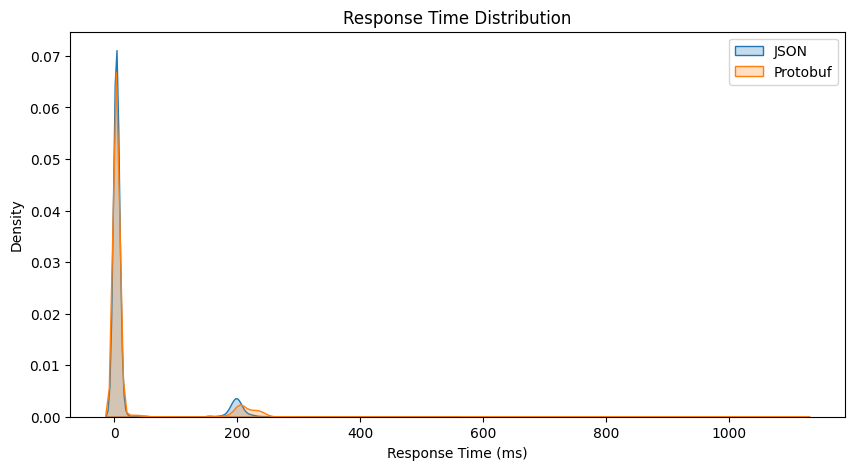

In [6]:
plt.figure(figsize=(10, 5))
sns.kdeplot(json_all_response_times, label="JSON", fill=True)
sns.kdeplot(protobuf_all_response_times, label="Protobuf", fill=True)
plt.xlabel("Response Time (ms)")
plt.ylabel("Density")
plt.title("Response Time Distribution")
plt.legend()
plt.show()

In [7]:
# Normality test
json_normality_p = normaltest(json_all_response_times).pvalue
protobuf_normality_p = normaltest(protobuf_all_response_times).pvalue

# Variance test
variance_p = levene(protobuf_all_response_times, json_all_response_times).pvalue

In [8]:
if json_normality_p > 0.05 and protobuf_normality_p > 0.05:
    test_stat, p_value = ttest_ind(
        protobuf_all_response_times,
        json_all_response_times,
        equal_var=(variance_p >= 0.05),
    )
    test_name = "t-test"
else:
    test_stat, p_value = mannwhitneyu(
        protobuf_all_response_times, json_all_response_times, alternative="two-sided"
    )
    test_name = "Mann-Whitney U test"

print(f"Aggregated Performance Test ({test_name})")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("Significant difference found!\n")
else:
    print("No significant difference.\n")

Aggregated Performance Test (Mann-Whitney U test)
p-value: 0.0
Significant difference found!



#### Per EndPoint Performance


In [9]:
def histogram_plot_data(df, title, label):
    plt.figure(figsize=(10, 6))
    sns.histplot(df, kde=True, stat="density")
    plt.axvline(0, color="red", linestyle="--")
    plt.title(
        title
    )
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.show()

In [10]:
def bootstrap_probability(a, b, n_bootsraps=10000):
    """
    Calculate the probability that the mean of a is greater than the mean of b using bootstrapping.
    
    Parameters:
    a (array-like): The first sample.
    b (array-like): The second sample.
    n_bootsraps (int): The number of bootstrap samples to take.
    
    Returns:
    p (float): The probability that the mean of a is greater than the mean of b.
    diffs (array): The differences in means from each bootstrap sample.
    ci (tuple): The 95% confidence interval of the differences.
    """
    diffs = []
    n = len(a)
    m = len(b)
    for _ in range(n_bootsraps):
        a_sample = np.random.choice(a, size=n, replace=True)
        b_sample = np.random.choice(b, size=m, replace=True)

        diffs.append(np.mean(a_sample) - np.mean(b_sample))

    diffs = np.array(diffs)

    p = np.mean(diffs < 0)
    ci_low, ci_high = np.percentile(diffs, [2.5, 97.5])

    return p, diffs, (ci_low, ci_high)

In [11]:
def compute_percentage_difference(a, b, is_lesser_better=True):
    if a == 0 or b == 0:
        return (0, False)

    if is_lesser_better:
        # For metrics where lower is better (e.g., response time)
        if b < a:
            improvement = ((a - b) / a) * 100
            return (round(improvement, 2), True)
        else:
            improvement = ((b - a) / a) * 100
            return (round(improvement, 2), False)
    else:
        # For metrics where higher is better (e.g., throughput)
        if b > a:
            improvement = ((b - a) / a) * 100
            return (round(improvement, 2), True)
        else:
            improvement = ((a - b) / a) * 100
            return (round(improvement, 2), False)

def compute_throughput_statistics(report, position):
    mean = 0
    median = 0
    throughput_values = np.array([])
    for df in report[position]:
        timestamps = extract_response_times(
            df, const.METRIC_NAME, const.TIMESTAP, const.HTTP_REQ_DURATION
        )
        throughput, mean, median = calculate_throughput(timestamps)
        throughput_values = np.concatenate([throughput_values, throughput])
    return throughput_values, mean, median


def compute_response_times_statistics(
    serialization, endpoint, report, position,
):
    table_data = pd.DataFrame(
        columns=[
            "Serialization",
            "Endpoint",
            "Average Response Time (ms)",
            "Throughput (req/s)",
            "Median",
            "Maximum Response Time (ms)",
            "Minimum Response Time (ms)",
            "std",
        ]
    )

    response_times = np.concatenate(
        [
            extract_response_times(
                df, const.METRIC_NAME, const.METRIC_VALUE, const.RESPONSE_TIME
            )
            for df in report[position] 
        ]
    )

    average_response_time = round(np.mean(response_times),2)
    median_response_time = round(np.median(response_times),2)
    max_response_time = round(np.max(response_times),2)
    min_response_time = round(np.min(response_times),2)
    std_response_time = round(np.std(response_times),2)
    throughput_values, mean_throughput, _ = (
        compute_throughput_statistics(report, position)
    )

    table_data = pd.DataFrame(
        {
            "Serialization": [serialization],
            "Endpoint": [endpoint],
            "Average Response Time (ms)": [average_response_time],
            "Throughput (req/s)": [mean_throughput],
            "Median": [median_response_time],
            "Maximum Response Time (ms)": [max_response_time],
            "Minimum Response Time (ms)": [min_response_time],
            "std": [std_response_time],
        }
    )

    return table_data, response_times, throughput_values


def compute_percentage_difference_perfomance(df):
    df = df.reset_index(drop=True)
    diff_average_response_time = compute_percentage_difference(
        df["Average Response Time (ms)"][0], df["Average Response Time (ms)"][1]
    )
    diff_median_response_time = compute_percentage_difference(
        df["Median"][0], df["Median"][1]
    )
    diff_max_response_time = compute_percentage_difference(
        df["Maximum Response Time (ms)"][0], df["Maximum Response Time (ms)"][1]
    )
    diff_min_response_time = compute_percentage_difference(
        df["Minimum Response Time (ms)"][0], df["Minimum Response Time (ms)"][1]
    )
    diff_std_response_time = compute_percentage_difference(df["std"][0], df["std"][1])
    diff_throughput = compute_percentage_difference(
        df["Throughput (req/s)"][0], df["Throughput (req/s)"][1], False
    )
    diff_table = pd.DataFrame(
        {
            "Average Response Time (ms)": [diff_average_response_time],
            "Throughput (req/s)": [diff_throughput],
            "Median": [diff_median_response_time],
            "Maximum Response Time (ms)": [diff_max_response_time],
            "Minimum Response Time (ms)": [diff_min_response_time],
            "std": [diff_std_response_time],
        }
    )
    return diff_table

,Serialization,Endpoint,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,JSON,create_user,200.56,4.80,198.97,546.08,141.94,21.21
0,Protobuf,create_user,214.69,4.45,211.16,1116.44,152.56,22.14


,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,"(7.05, False)","(7.29, False)","(6.13, False)","(104.45, False)","(7.48, False)","(4.38, False)"


Endpoint: create_user
JSON Median Response Time: 198.97308550000002
Protobuf Median Response Time: 211.162824
Cliff’s Delta: -0.4767270311111111 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


Response Time Bayesian Bootstrap Analysis
Probability that JSON mean is greater than Protobuf mean: 0.0
95% Confidence Interval: (np.float64(13.781187403309149), np.float64(14.483348894802473))


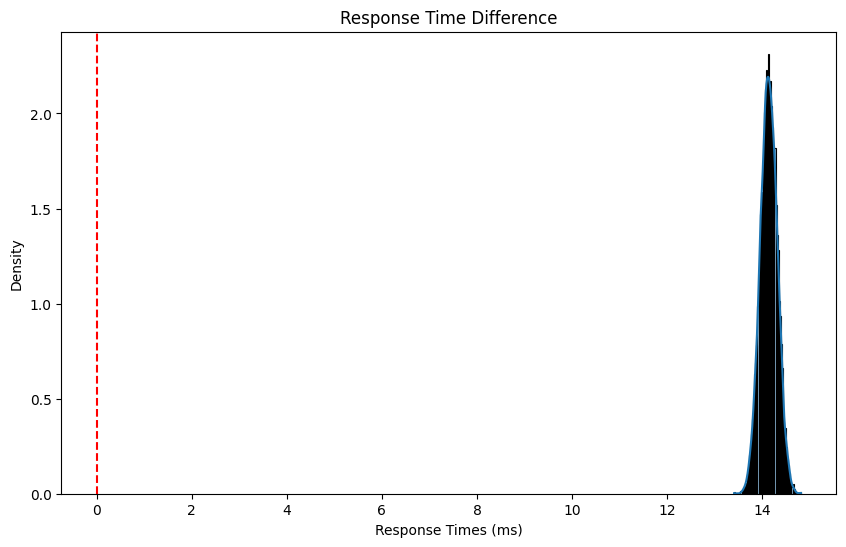

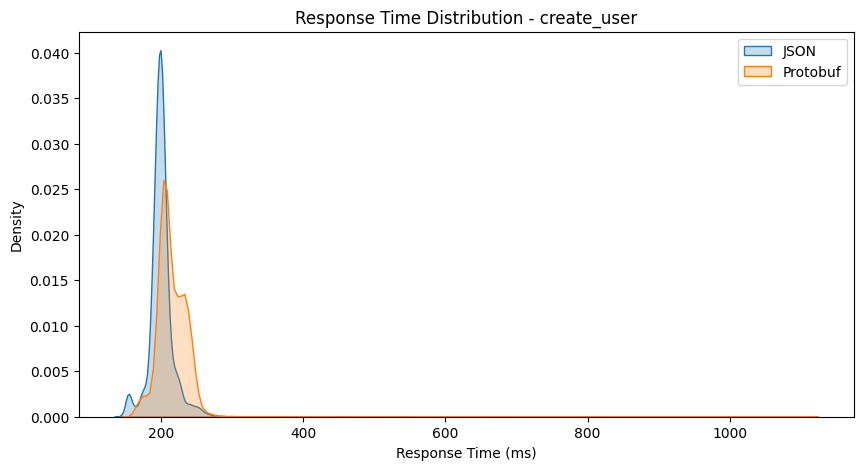

Endpoint: create_user (Mann-Whitney U test)
p-value: 1.0
No significant difference.



,Serialization,Endpoint,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,JSON,get_all_users,4.23,233.90,3.68,88.12,1.81,3.16
0,Protobuf,get_all_users,4.40,259.17,3.25,103.81,1.55,5.55


,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,"(4.02, False)","(10.8, True)","(11.68, True)","(17.81, False)","(14.36, True)","(75.63, False)"


Endpoint: get_all_users
JSON Median Response Time: 3.681249
Protobuf Median Response Time: 3.247939
Cliff’s Delta: 0.2690416408641975 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


Response Time Bayesian Bootstrap Analysis
Probability that JSON mean is greater than Protobuf mean: 0.0
95% Confidence Interval: (np.float64(0.12242531472027915), np.float64(0.20655674991222153))


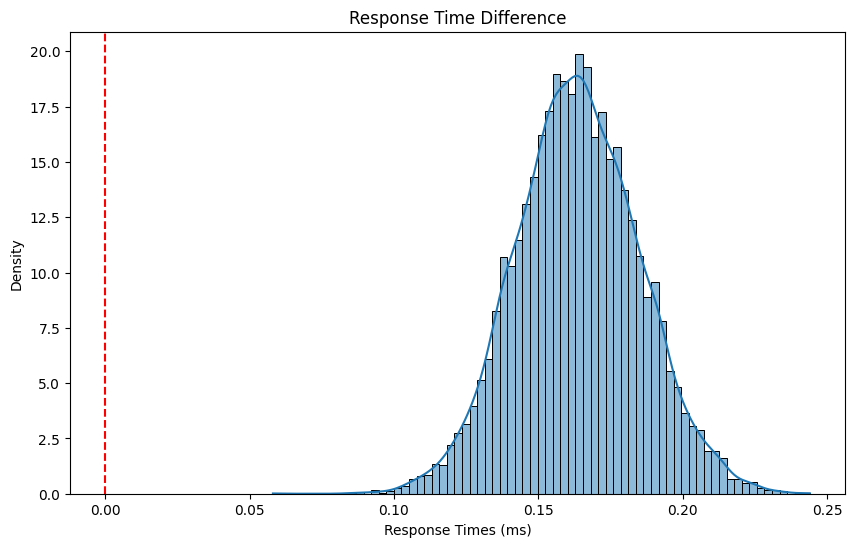

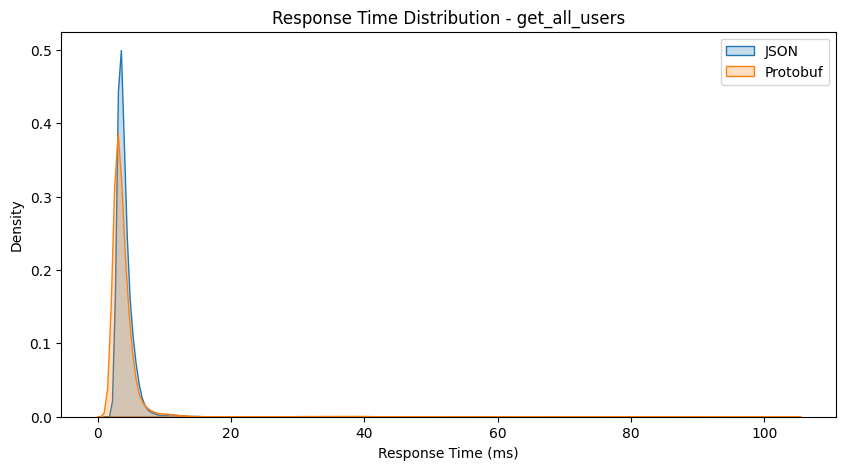

Endpoint: get_all_users (Mann-Whitney U test)
p-value: 0.0
Significant difference found!



,Serialization,Endpoint,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,JSON,get_user_id,3.44,371.55,2.34,392.56,0.96,5.99
0,Protobuf,get_user_id,3.36,383.12,2.27,650.04,1.01,6.07


,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,"(2.33, True)","(3.11, True)","(2.99, True)","(65.59, False)","(5.21, False)","(1.34, False)"


Endpoint: get_user_id
JSON Median Response Time: 2.340561
Protobuf Median Response Time: 2.2687850000000003
Cliff’s Delta: 0.06473175049382716 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.170158098698893e-123


Response Time Bayesian Bootstrap Analysis
Probability that JSON mean is greater than Protobuf mean: 0.9989
95% Confidence Interval: (np.float64(-0.14379175683249978), np.float64(-0.031692038956944286))


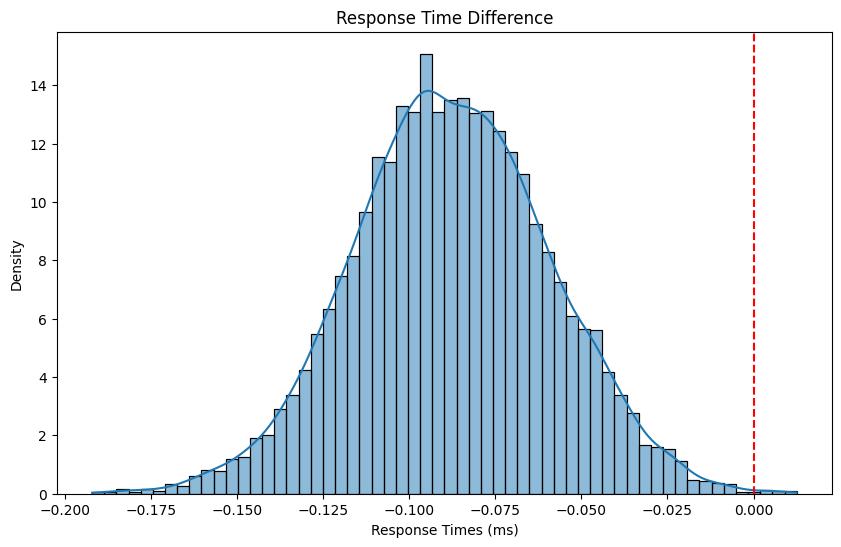

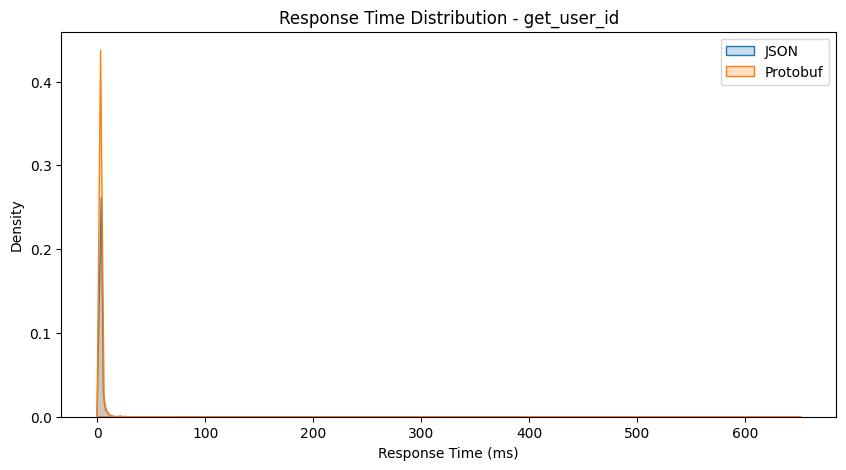

Endpoint: get_user_id (Mann-Whitney U test)
p-value: 2.4510926529072244e-125
Significant difference found!



,Serialization,Endpoint,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,JSON,get_all_product_entities,3.65,286.79,3.07,194.59,1.50,3.87
0,Protobuf,get_all_product_entities,3.28,313.59,2.75,92.64,1.37,3.02


,Average Response Time (ms),Throughput (req/s),Median,Maximum Response Time (ms),Minimum Response Time (ms),std
0,"(10.14, True)","(9.34, True)","(10.42, True)","(52.39, True)","(8.67, True)","(21.96, True)"


Endpoint: get_all_product_entities
JSON Median Response Time: 3.07141
Protobuf Median Response Time: 2.7460975
Cliff’s Delta: 0.27166890679012345 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


Response Time Bayesian Bootstrap Analysis
Probability that JSON mean is greater than Protobuf mean: 1.0
95% Confidence Interval: (np.float64(-0.40535583599583314), np.float64(-0.34168673178305525))


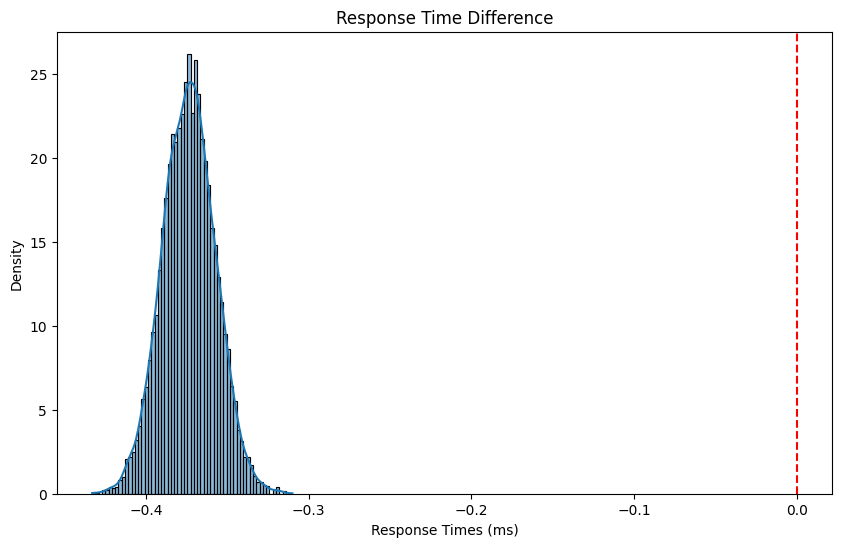

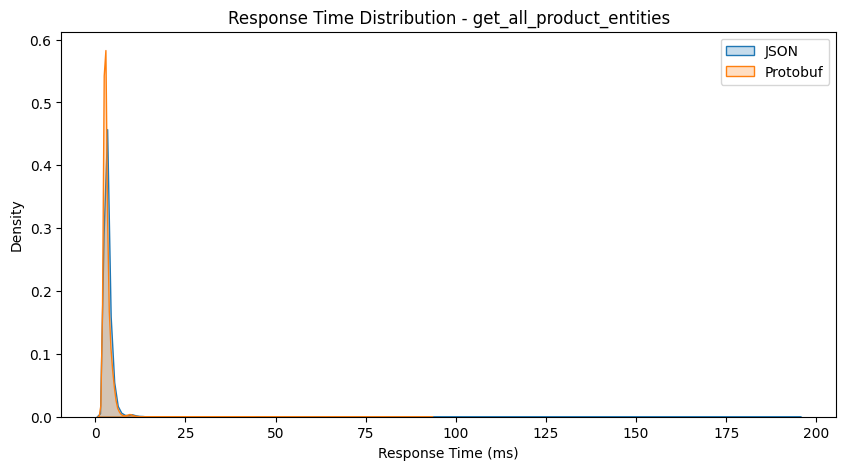

Endpoint: get_all_product_entities (Mann-Whitney U test)
p-value: 0.0
Significant difference found!



In [12]:
for i, endpoint in enumerate(endpoints):

    json_table_data,json_response_times,_ = compute_response_times_statistics(
        "JSON", endpoint,  json_reports, i
    )
    protobuf_table_data,protobuf_response_times,_ = compute_response_times_statistics(
        "Protobuf", endpoint,  protobuf_reports, i
    )

    concat_table = pd.concat([json_table_data, protobuf_table_data])
    display(concat_table)

    diff_table = compute_percentage_difference_perfomance(concat_table)
    display(diff_table)

    json_median = np.median(json_response_times)
    protobuf_median = np.median(protobuf_response_times)

    delta, res = cliffs_delta(json_response_times, protobuf_response_times)

    _, p_median, _, _ = median_test(protobuf_response_times, json_response_times)

    print(f"Endpoint: {endpoint}")
    print(f"JSON Median Response Time: {json_median}")
    print(f"Protobuf Median Response Time: {protobuf_median}")
    print(
        f"Cliff’s Delta: {delta} (Interpretation: Small <0.147, Medium <0.33, Large >0.33)"
    )
    print(f"Median Test p-value: {p_median}")

    print("\n")
    print("Response Time Bayesian Bootstrap Analysis")
    p, diffs, ci = bootstrap_probability(protobuf_response_times, json_response_times)
    print(f"Probability that JSON mean is greater than Protobuf mean: {p}")
    print(f"95% Confidence Interval: {ci}") 
    histogram_plot_data(diffs, "Response Time Difference", "Response Times (ms)")
    
        

    plt.figure(figsize=(10, 5))
    sns.kdeplot(json_response_times, label="JSON", fill=True)
    sns.kdeplot(protobuf_response_times, label="Protobuf", fill=True)
    plt.xlabel("Response Time (ms)")
    plt.ylabel("Density")
    plt.title(f"Response Time Distribution - {endpoint}")
    plt.legend()
    plt.show()

    json_normality_p = normaltest(json_response_times).pvalue
    protobuf_normality_p = normaltest(protobuf_response_times).pvalue
    variance_p = levene(protobuf_response_times, json_all_response_times).pvalue

    if json_normality_p > 0.05 and protobuf_normality_p > 0.05:
        test_stat, p_value = ttest_ind(
            protobuf_response_times,
            json_all_response_times,
            equal_var=(variance_p >= 0.05),
        )
        test_name = "t-test"
    else:
        test_stat, p_value = mannwhitneyu(
            protobuf_response_times, json_response_times, alternative="less"
        )
        test_name = "Mann-Whitney U test"

    print(f"Endpoint: {endpoint} ({test_name})")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Significant difference found!\n")
    else:
        print("No significant difference.\n")

Endpoint: create_user
JSON throughput size: 30000
Protobuf throughput size: 30000
=== Basic Statistics ===
JSON: mean = 5.02, std = 0.47
Protobuf: mean = 4.69, std = 0.49

=== Mann-Whitney U Test ===
U statistic = 318964318.0, p-value = 0.0000

=== Bayesian Estimation Results ===
Probability  Protobuf > JSON: -0.3286
95% Credible Interval for difference: [-0.34, -0.32]
95% Credible Interval for % improvement: [-0.34%, -0.32%]


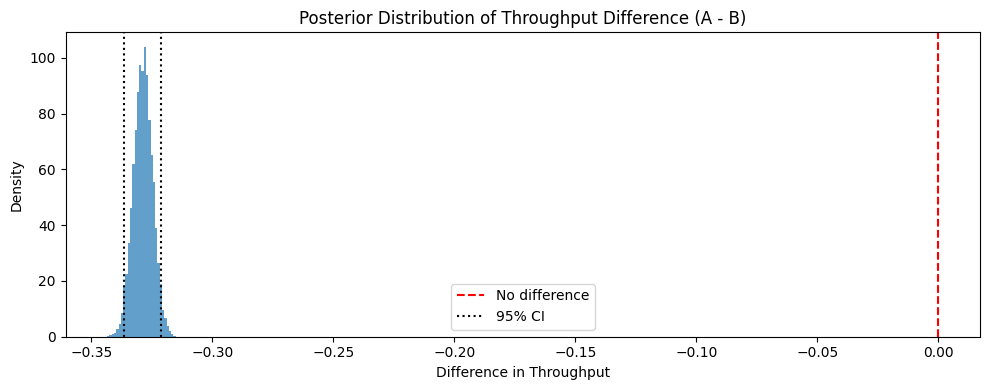

JSON Median Throughput: 5.0
Protobuf Median Throughput: 5.0
Cliff’s Delta: 0.29119040444444444 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


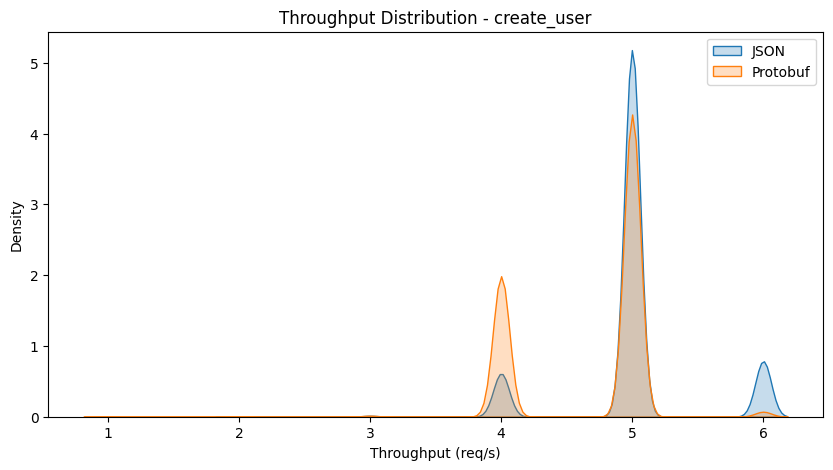

Endpoint: create_user (Mann-Whitney U test)
p-value: 1.0
No significant difference.

Endpoint: get_all_users
JSON throughput size: 90000
Protobuf throughput size: 90000
=== Basic Statistics ===
JSON: mean = 224.70, std = 33.27
Protobuf: mean = 241.46, std = 58.62

=== Mann-Whitney U Test ===
U statistic = 5882089140.0, p-value = 0.0000

=== Bayesian Estimation Results ===
Probability  Protobuf > JSON: 16.7671
95% Credible Interval for difference: [16.33, 17.21]
95% Credible Interval for % improvement: [16.33%, 17.21%]


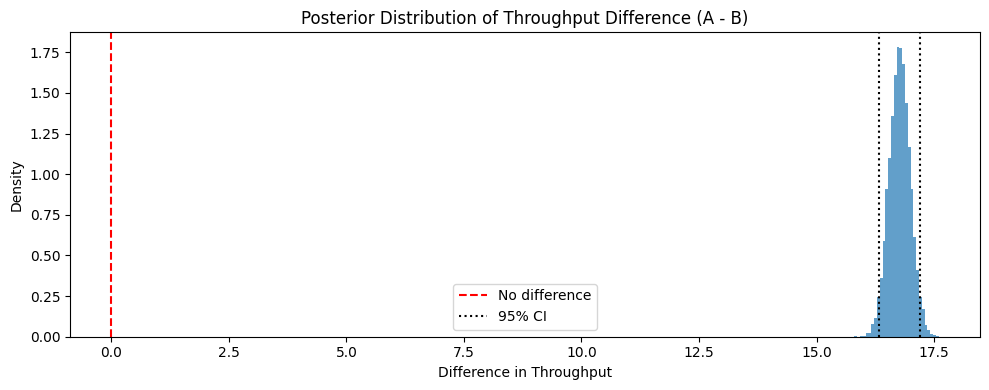

JSON Median Throughput: 237.0
Protobuf Median Throughput: 260.0
Cliff’s Delta: -0.4523676888888889 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


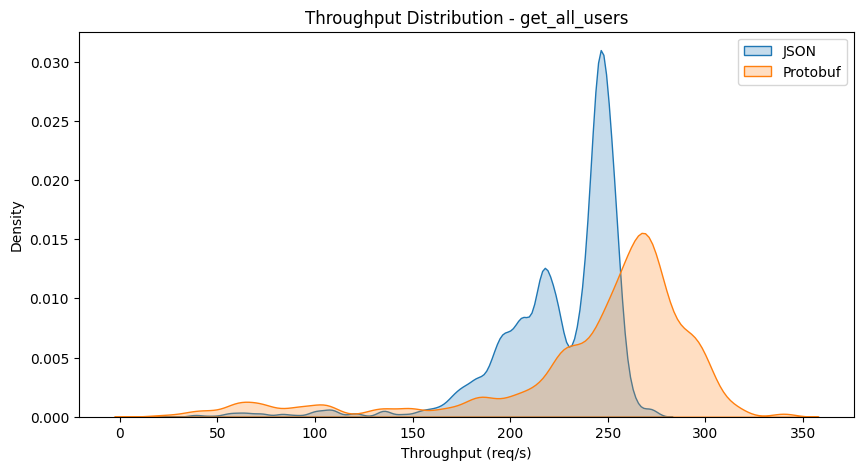

Endpoint: get_all_users (Mann-Whitney U test)
p-value: 0.0
Significant difference found!

Endpoint: get_user_id
JSON throughput size: 90000
Protobuf throughput size: 90000
=== Basic Statistics ===
JSON: mean = 339.87, std = 93.23
Protobuf: mean = 350.42, std = 95.53

=== Mann-Whitney U Test ===
U statistic = 4668617884.0, p-value = 0.0000

=== Bayesian Estimation Results ===
Probability  Protobuf > JSON: 10.5614
95% Credible Interval for difference: [9.69, 11.43]
95% Credible Interval for % improvement: [9.69%, 11.43%]


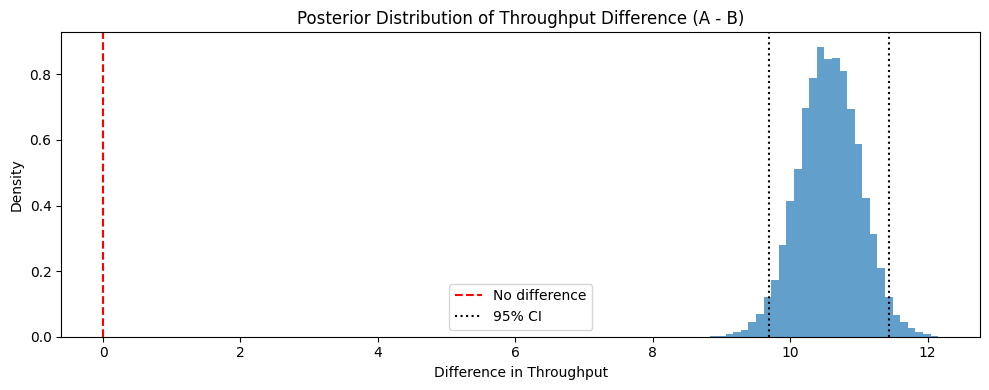

JSON Median Throughput: 371.0
Protobuf Median Throughput: 383.0
Cliff’s Delta: -0.1527451565432099 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


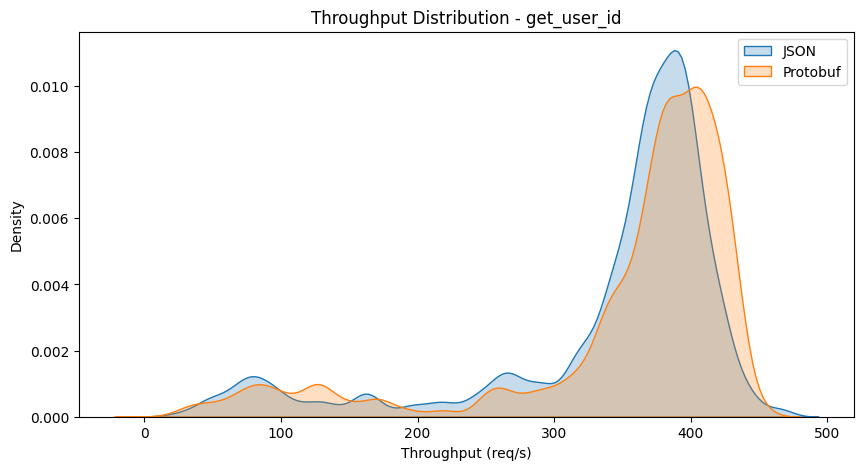

Endpoint: get_user_id (Mann-Whitney U test)
p-value: 0.0
Significant difference found!

Endpoint: get_all_product_entities
JSON throughput size: 90000
Protobuf throughput size: 90000
=== Basic Statistics ===
JSON: mean = 270.24, std = 43.86
Protobuf: mean = 299.45, std = 54.04

=== Mann-Whitney U Test ===
U statistic = 5885502512.0, p-value = 0.0000

=== Bayesian Estimation Results ===
Probability  Protobuf > JSON: 29.2050
95% Credible Interval for difference: [28.75, 29.66]
95% Credible Interval for % improvement: [28.75%, 29.66%]


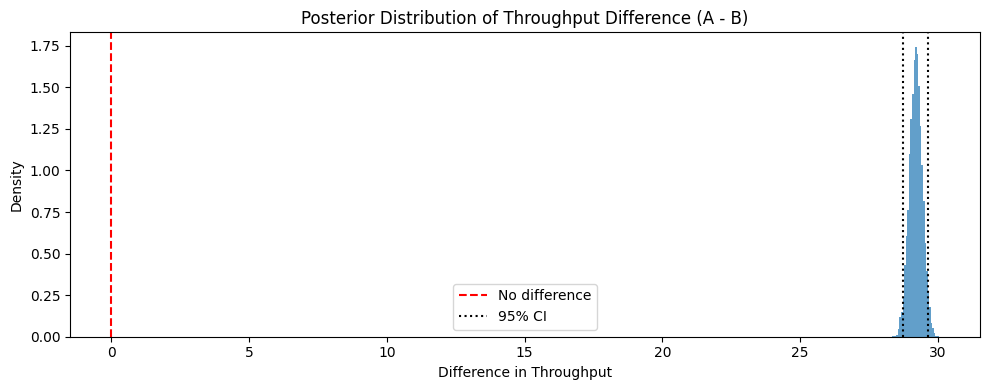

JSON Median Throughput: 285.0
Protobuf Median Throughput: 315.0
Cliff’s Delta: -0.45321049679012343 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 0.0


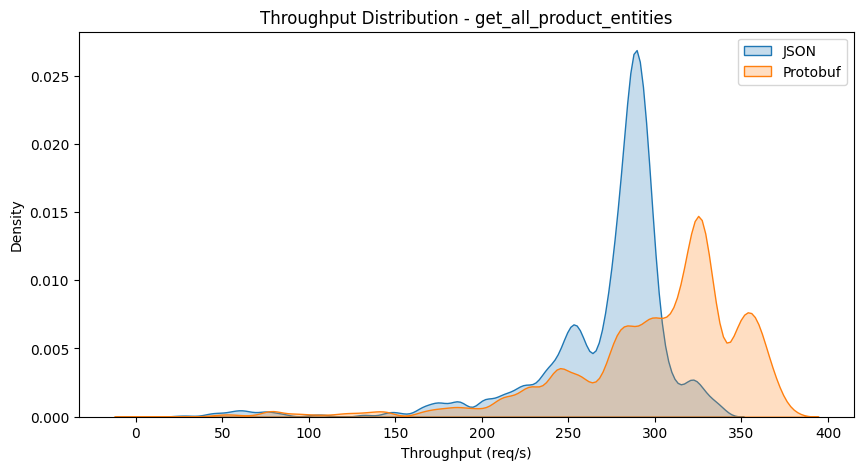

Endpoint: get_all_product_entities (Mann-Whitney U test)
p-value: 0.0
Significant difference found!



In [13]:
### Throughput
for i, endpoint in enumerate(endpoints):

    print(f"Endpoint: {endpoint}")
    json_troughput_values = []
    for df in json_reports[i]:
        response_times = extract_response_times(
            df, const.METRIC_NAME, const.METRIC_VALUE, const.HTTP_REQ_DURATION
        )
        timestamps = extract_response_times(
            df, const.METRIC_NAME, const.TIMESTAP, const.HTTP_REQ_DURATION
        )
        throughput, mean, median = calculate_throughput(timestamps)
        json_troughput_values = np.concatenate([json_troughput_values, throughput])

    protobuf_troughput_values = []
    for df in protobuf_reports[i]:
        response_times = extract_response_times(
            df, const.METRIC_NAME, const.METRIC_VALUE, const.HTTP_REQ_DURATION
        )
        timestamps = extract_response_times(
            df, const.METRIC_NAME, const.TIMESTAP, const.HTTP_REQ_DURATION
        )
        throughput, mean, median = calculate_throughput(timestamps)
        protobuf_troughput_values = np.concatenate(
            [protobuf_troughput_values, throughput]
        )

    print(f"JSON throughput size: {len(json_troughput_values)}")
    print(f"Protobuf throughput size: {len(protobuf_troughput_values)}")

    print("=== Basic Statistics ===")
    print(
        f"JSON: mean = {np.mean(json_troughput_values):.2f}, std = {np.std(json_troughput_values, ddof=1):.2f}"
    )
    print(
        f"Protobuf: mean = {np.mean(protobuf_troughput_values):.2f}, std = {np.std(protobuf_troughput_values, ddof=1):.2f}"
    )

    u_stat, p_value = mannwhitneyu(
        protobuf_troughput_values, json_troughput_values, alternative="two-sided"
    )
    print(f"\n=== Mann-Whitney U Test ===")
    print(f"U statistic = {u_stat}, p-value = {p_value:.4f}")

    probability,diff_samples, pct_diff_ci = bootstrap_probability(
        protobuf_troughput_values, json_troughput_values
    )
    prob_protobuf_better = np.mean(diff_samples)
    diff_ci = np.percentile(diff_samples, [2.5, 97.5])

    print("\n=== Bayesian Estimation Results ===")
    print(f"Probability  Protobuf > JSON: {prob_protobuf_better:.4f}")
    print(f"95% Credible Interval for difference: [{diff_ci[0]:.2f}, {diff_ci[1]:.2f}]")
    print(
        f"95% Credible Interval for % improvement: [{pct_diff_ci[0]:.2f}%, {pct_diff_ci[1]:.2f}%]"
    )

    plt.figure(figsize=(10, 4))
    plt.hist(diff_samples, bins=30, alpha=0.7, density=True)
    plt.axvline(x=0, color="red", linestyle="--", label="No difference")
    plt.axvline(x=diff_ci[0], color="black", linestyle=":", label="95% CI")
    plt.axvline(x=diff_ci[1], color="black", linestyle=":")
    plt.title("Posterior Distribution of Throughput Difference (A - B)")
    plt.xlabel("Difference in Throughput")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    json_median = np.median(json_troughput_values)
    protobuf_median = np.median(protobuf_troughput_values)

    delta, res = cliffs_delta(json_troughput_values, protobuf_troughput_values)

    _, p_median, _, _ = median_test(protobuf_troughput_values, json_troughput_values)

    print(f"JSON Median Throughput: {json_median}")
    print(f"Protobuf Median Throughput: {protobuf_median}")
    print(
        f"Cliff’s Delta: {delta} (Interpretation: Small <0.147, Medium <0.33, Large >0.33)"
    )
    print(f"Median Test p-value: {p_median}")

    plt.figure(figsize=(10, 5))
    sns.kdeplot(json_troughput_values, label="JSON", fill=True)
    sns.kdeplot(protobuf_troughput_values, label="Protobuf", fill=True)
    plt.xlabel("Throughput (req/s)")
    plt.ylabel("Density")
    plt.title(f"Throughput Distribution - {endpoint}")
    plt.legend()
    plt.show()

    json_normality_p = normaltest(json_troughput_values).pvalue
    protobuf_normality_p = normaltest(protobuf_troughput_values).pvalue
    variance_p = levene(protobuf_troughput_values, json_troughput_values).pvalue

    if json_normality_p > 0.05 and protobuf_normality_p > 0.05:
        test_stat, p_value = ttest_ind(
            protobuf_troughput_values,
            json_troughput_values,
            equal_var=(variance_p >= 0.05),
        )
        test_name = "t-test"
    else:
        test_stat, p_value = mannwhitneyu(
            protobuf_troughput_values, json_troughput_values, alternative="greater"
        )
        test_name = "Mann-Whitney U test"

    print(f"Endpoint: {endpoint} ({test_name})")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Significant difference found!\n")
    else:
        print("No significant difference.\n")

### Energy Consumption


#### Global Energy Consumption


In [14]:
json_median = np.median(json_all_pod_reports)
protobuf_median = np.median(protobuf_all_pod_reports)

delta, res = cliffs_delta(json_all_pod_reports, protobuf_all_pod_reports)

_, p_median, _, _ = median_test(json_all_pod_reports, protobuf_all_pod_reports)

print(f"JSON Median Energy Consumption: {json_median}")
print(f"Protobuf Median Energy Consumption: {protobuf_median}")
print(
    f"Cliff’s Delta: {delta} (Interpretation: Small <0.147, Medium <0.33, Large >0.33)"
)
print(f"Median Test p-value: {p_median}")

JSON Median Energy Consumption: 0.01955
Protobuf Median Energy Consumption: 0.0197
Cliff’s Delta: 0.07182554281982358 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.0


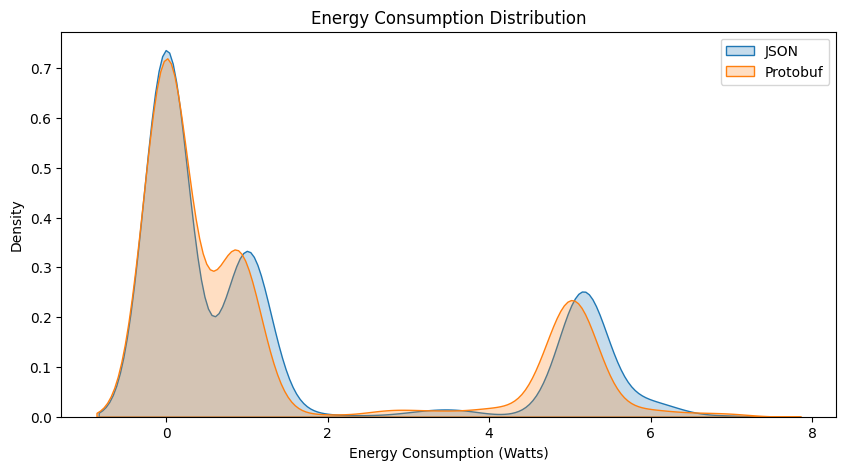

In [15]:
plt.figure(figsize=(10, 5))
sns.kdeplot(json_all_pod_reports, label="JSON", fill=True)
sns.kdeplot(protobuf_all_pod_reports, label="Protobuf", fill=True)
plt.xlabel("Energy Consumption (Watts)")
plt.ylabel("Density")
plt.title("Energy Consumption Distribution")
plt.legend()
plt.show()

In [16]:
# Normality test
json_normality_p = normaltest(json_all_pod_reports).pvalue
protobuf_normality_p = normaltest(protobuf_all_pod_reports).pvalue

# Variance test
variance_p = levene(json_all_pod_reports, protobuf_all_pod_reports).pvalue

In [17]:
# Choose the correct statistical test
if json_normality_p > 0.05 and protobuf_normality_p > 0.05:
    test_stat, p_value = ttest_ind(
        json_all_pod_reports,
        protobuf_all_pod_reports,
        equal_var=(variance_p >= 0.05),
    )
    test_name = "t-test"
else:
    test_stat, p_value = mannwhitneyu(
        json_all_pod_reports,
        protobuf_all_pod_reports,
        alternative="two-sided",
    )
    test_name = "Mann-Whitney U test"

print(f"Energy Consumption ({test_name})")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("Significant difference found!\n")
else:
    print("No significant difference.\n")

Energy Consumption (Mann-Whitney U test)
p-value: 7.353445980321346e-41
Significant difference found!



#### Per EndPoint Energy Consumption


In [18]:
## Display Table with data
### Total joules, average joules, median joules,max, min, std, joules per request,


def compute_energy_statistics(
    serialization, endpoint, pod_report_list, is_creation=False
):
    print(f"{len(pod_report_list)}")
    print(f"{len(pod_report_list[0])}")
    total_requests_create = 10000 * len(pod_report_list)
    total_requests_retreive = 30000 * len(pod_report_list)
    table_dataframe_data = pd.DataFrame(
        columns=[
            "serialization",
            "endpoint",
            "Total Joules",
            "Total Average Joules",
            "Average Joules",
            "Median Joules",
            "maximum Joules",
            "minimum Joules",
            "std",
            "Joules per Request",
        ]
    )
    energy_consumption = np.concatenate(
        [
            extract_energy_consumption(
                df, [const.PKG, const.OTHER, const.DRAM, const.GPU]
            )
            for df in pod_report_list
        ]
    )

    total_average_trial = np.zeros(len(pod_report_list))
    for i in range(len(pod_report_list)):
        total_average_trial[i] = np.sum(
            extract_energy_consumption(
                pod_report_list[i], [const.PKG, const.OTHER, const.DRAM, const.GPU]
            )
        )
    
    

    total_energy_consumption = round(np.sum(energy_consumption), 2)
    total_average_energy_consumption = round(np.mean(total_average_trial), 2)
    average_energy_consumption = round(np.mean(energy_consumption), 2)
    median_energy_consumption = round(np.median(energy_consumption), 2)
    max_energy_consumption = round(np.max(energy_consumption), 2)
    min_energy_consumption = round(np.min(energy_consumption), 2)
    std_energy_consumption = round(np.std(energy_consumption, ddof=1), 2)
    joules_per_request = round(total_energy_consumption / (
        total_requests_create if is_creation else total_requests_retreive
    ),2)

    table_dataframe_data = pd.DataFrame(
        {
            "serialization": [serialization],
            "endpoint": [endpoint],
            "Total Joules": [total_energy_consumption],
            "Total Average Joules": [total_average_energy_consumption],
            "Average Joules": [average_energy_consumption],
            "Median Joules": [median_energy_consumption],
            "maximum Joules": [max_energy_consumption],
            "minimum Joules": [min_energy_consumption],
            "std": [std_energy_consumption],
            "Joules per Request": [joules_per_request],
        }
    )
    return table_dataframe_data, energy_consumption

In [21]:

def display_percentage_difference_energy(df):
    
    diff_total_joules = compute_percentage_difference(df["Total Joules"].values[0],df["Total Joules"].values[1])
    diff_average_total_joules = compute_percentage_difference(df["Total Average Joules"].values[0],df["Total Average Joules"].values[1])
    diff_average_joules = compute_percentage_difference(df["Average Joules"].values[0],df["Average Joules"].values[1])
    diff_median_joules = compute_percentage_difference(df["Median Joules"].values[0],df["Median Joules"].values[1])
    diff_max_joules = compute_percentage_difference(df["maximum Joules"].values[0],df["maximum Joules"].values[1])
    diff_min_joules = compute_percentage_difference(df["minimum Joules"].values[0],df["minimum Joules"].values[1])
    diff_std_joules = compute_percentage_difference(df["std"].values[0],df["std"].values[1])
    diff_joules_per_request = compute_percentage_difference(df["Joules per Request"].values[0],df["Joules per Request"].values[1])
    
    diff_table = pd.DataFrame(
        {
            "Total Joules": [diff_total_joules],
            "Total Average Joules": [diff_average_total_joules],
            "Average Joules": [diff_average_joules],
            "Median Joules": [diff_median_joules],
            "maximum Joules": [diff_max_joules],
            "minimum Joules": [diff_min_joules],
            "std": [diff_std_joules],
            "Joules per Request": [diff_joules_per_request],
        }
    )
    return diff_table
    

Endpoint: create_user (Mann-Whitney U test)
3
1930
3
1026


,serialization,endpoint,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,JSON,create_user,30585.45,10195.15,1.53,0.02,6.33,0.0,2.14,1.02
0,Protobuf,create_user,18919.51,6306.50,1.46,0.02,6.31,0.0,2.08,0.63


,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,"(38.14, True)","(38.14, True)","(4.58, True)","(0.0, False)","(0.32, True)","(0, False)","(2.8, True)","(38.24, True)"


Probability of Protobuf > JSON: 0.9991
95% CI for differenc in energy consumption Protobuf > JSON: [-0.1204, -0.0266]


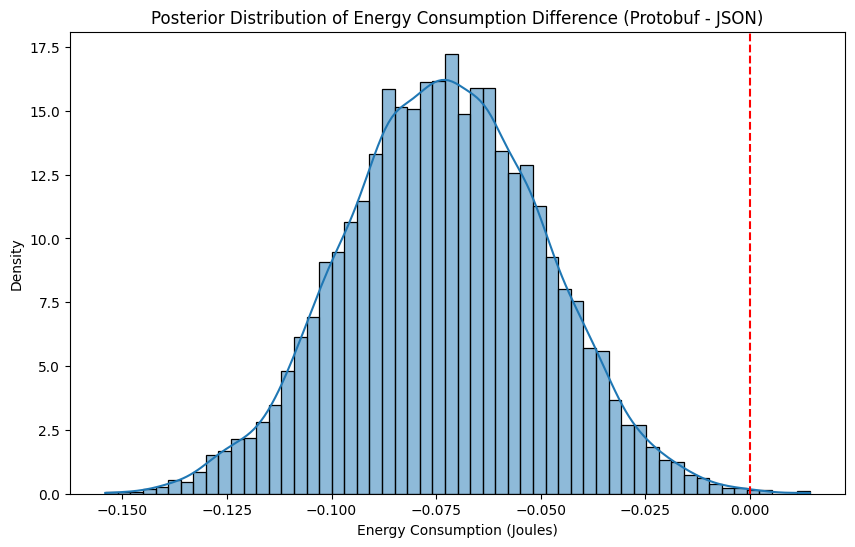

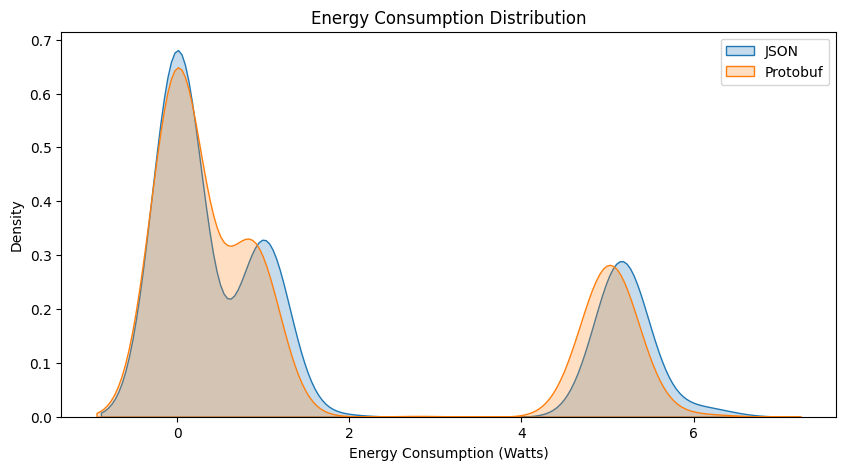

JSON Median Energy Consumption: 0.01955
Protobuf Median Energy Consumption: 0.02145
JSON Total Energy Consumption: 30585.4539 Joules
Protobuf Total Energy Consumption: 18919.511300000002 Joules
Cliff’s Delta: 0.0931397641126303 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.0


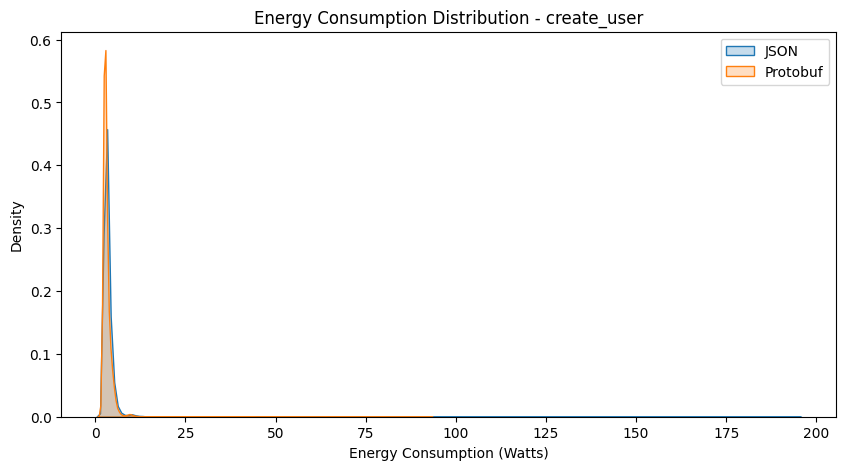

p-value: 5.19090214729764e-53
Significant difference found!

Endpoint: get_all_users (Mann-Whitney U test)
3
160
3
205


,serialization,endpoint,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,JSON,get_all_users,2446.82,815.61,1.46,0.02,7.02,0.0,2.26,0.03
0,Protobuf,get_all_users,2206.28,735.43,1.26,0.02,7.00,0.0,2.02,0.02


,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,"(9.83, True)","(9.83, True)","(13.7, True)","(0.0, False)","(0.28, True)","(0, False)","(10.62, True)","(33.33, True)"


Probability of Protobuf > JSON: 0.9972
95% CI for differenc in energy consumption Protobuf > JSON: [-0.3418, -0.0553]


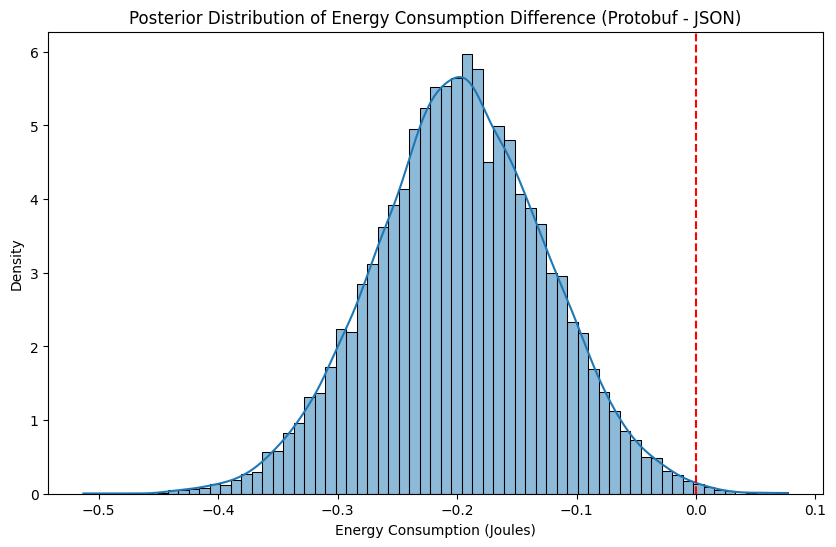

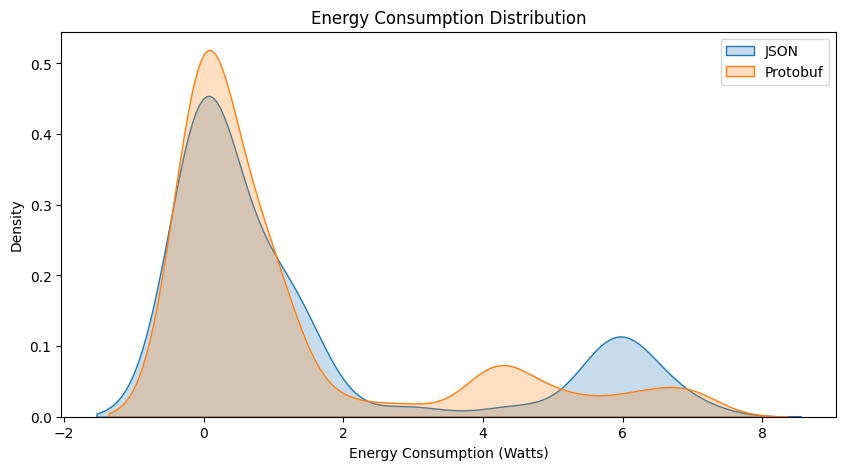

JSON Median Energy Consumption: 0.0223
Protobuf Median Energy Consumption: 0.024
JSON Total Energy Consumption: 2446.819 Joules
Protobuf Total Energy Consumption: 2206.2793 Joules
Cliff’s Delta: 0.037691617742987606 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.0


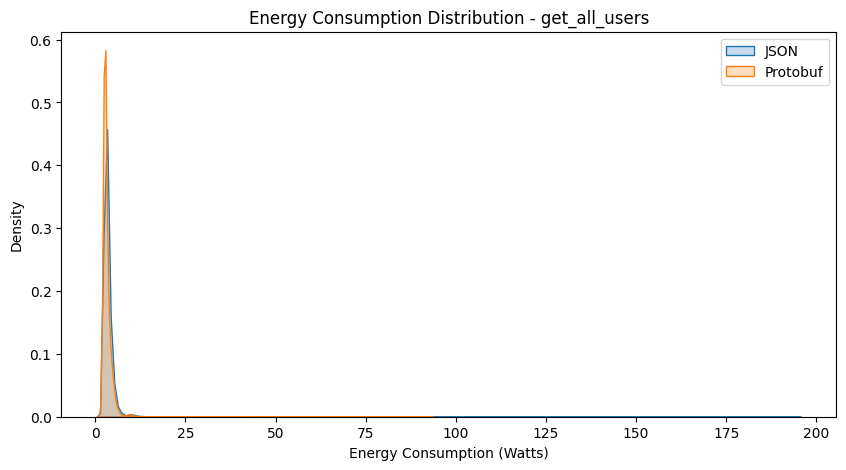

p-value: 0.02049685085391847
Significant difference found!

Endpoint: get_user_id (Mann-Whitney U test)
3
175
3
172


,serialization,endpoint,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,JSON,get_user_id,1348.92,449.64,1.00,0.02,5.71,0.0,1.63,0.01
0,Protobuf,get_user_id,1400.43,466.81,1.06,0.02,6.61,0.0,1.77,0.02


,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,"(3.82, False)","(3.82, False)","(6.0, False)","(0.0, False)","(15.76, False)","(0, False)","(8.59, False)","(100.0, False)"


Probability of Protobuf > JSON: 0.1955
95% CI for differenc in energy consumption Protobuf > JSON: [-0.0714, 0.1852]


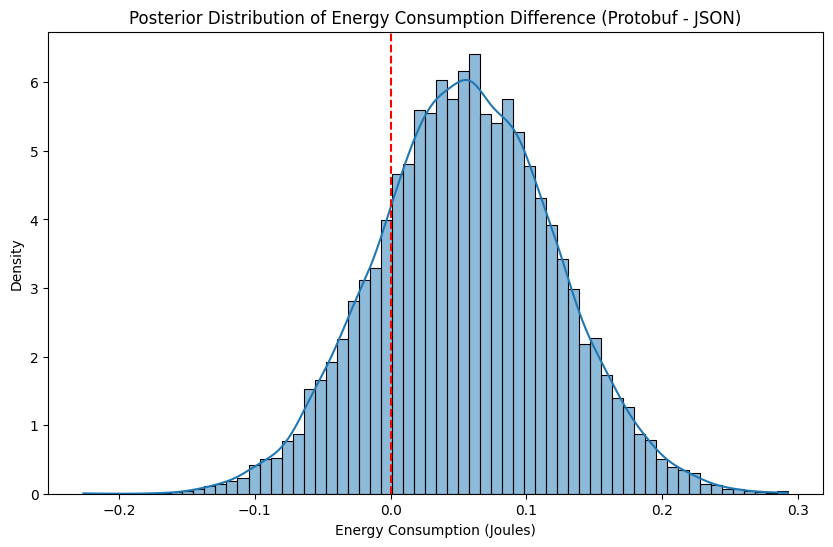

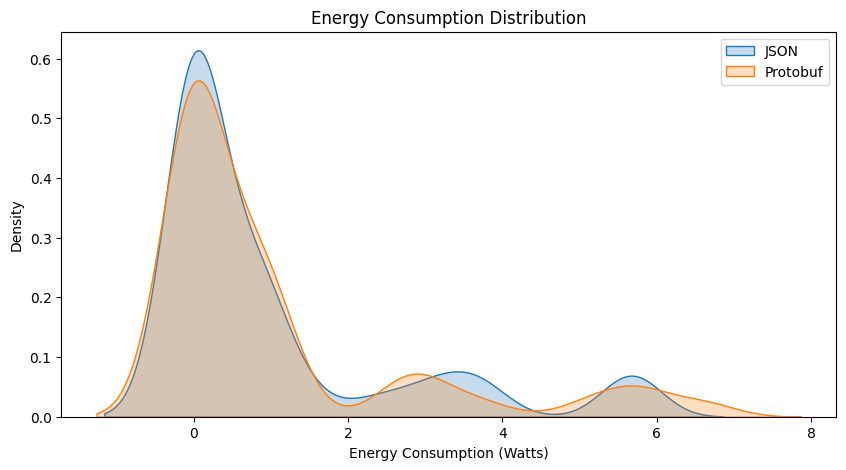

JSON Median Energy Consumption: 0.0245
Protobuf Median Energy Consumption: 0.023
JSON Total Energy Consumption: 1348.9229999999998 Joules
Protobuf Total Energy Consumption: 1400.4271999999999 Joules
Cliff’s Delta: -0.007999991035169032 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.0


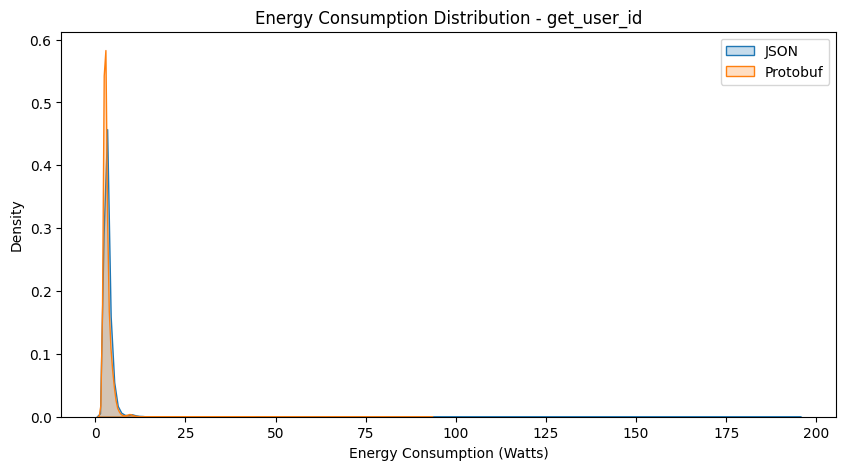

p-value: 0.6490699303620703
No significant difference.

Endpoint: get_all_product_entities (Mann-Whitney U test)
3
140
3
128


,serialization,endpoint,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,JSON,get_all_product_entities,1398.76,466.25,0.97,0.02,5.42,0.0,1.46,0.02
0,Protobuf,get_all_product_entities,1334.70,444.90,1.03,0.02,6.03,0.0,1.57,0.01


,Total Joules,Total Average Joules,Average Joules,Median Joules,maximum Joules,minimum Joules,std,Joules per Request
0,"(4.58, True)","(4.58, True)","(6.19, False)","(0.0, False)","(11.25, False)","(0, False)","(7.53, False)","(50.0, True)"


Probability of Protobuf > JSON: 0.1631
95% CI for differenc in energy consumption Protobuf > JSON: [-0.0593, 0.1717]


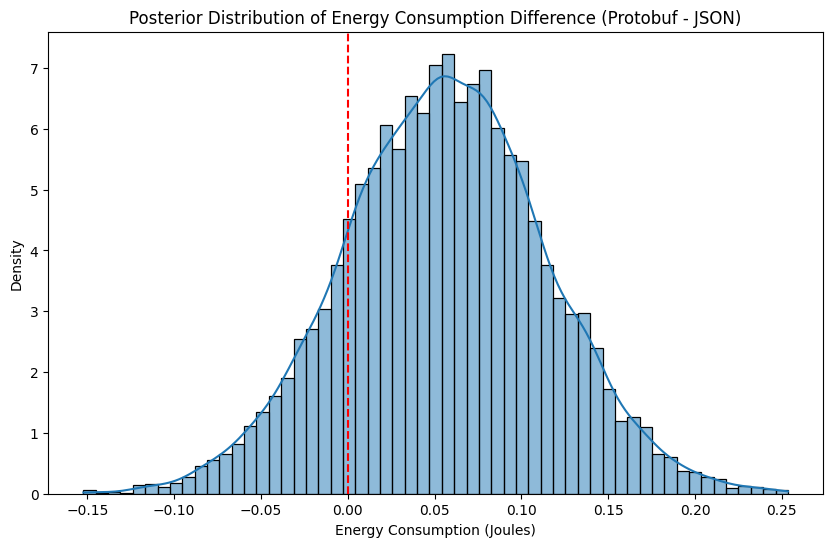

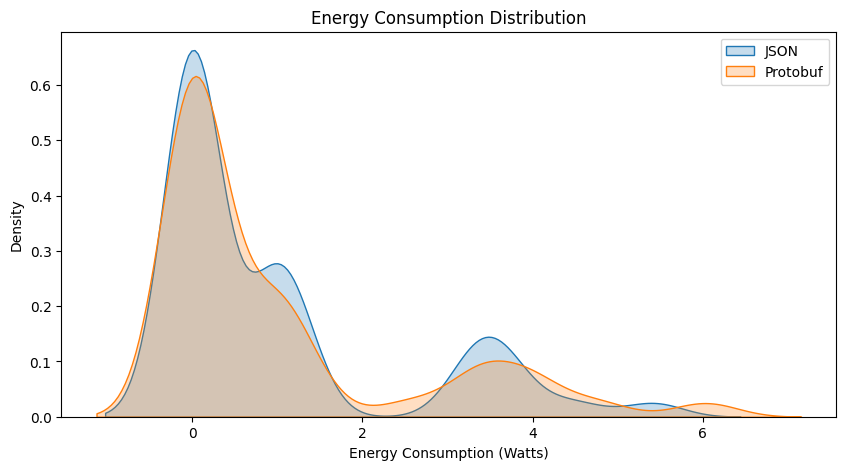

JSON Median Energy Consumption: 0.0228
Protobuf Median Energy Consumption: 0.0197
JSON Total Energy Consumption: 1398.7605 Joules
Protobuf Total Energy Consumption: 1334.6962 Joules
Cliff’s Delta: -0.0032626637779841123 (Interpretation: Small <0.147, Medium <0.33, Large >0.33)
Median Test p-value: 1.0


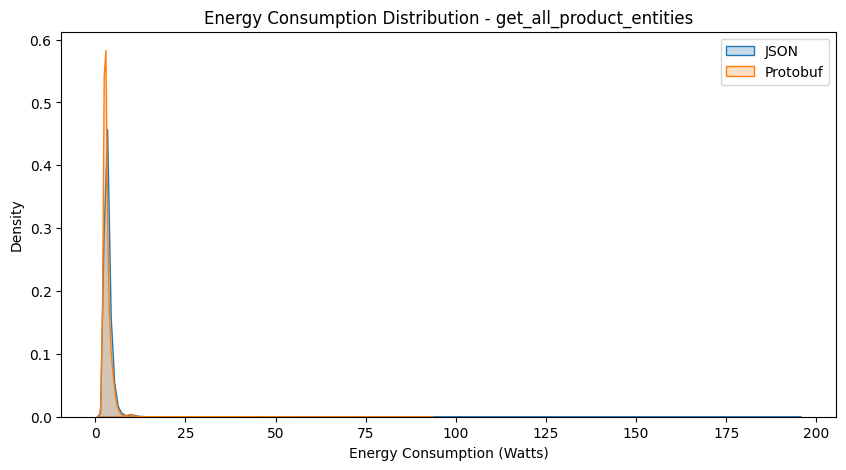

p-value: 0.5626458050607137
No significant difference.



In [22]:
JSON = "JSON"
PROTOBUF = "Protobuf"
for i, endpoint in enumerate(endpoints):
    print(f"Endpoint: {endpoint} ({test_name})")
    is_creation = True if i == 0 else False

    json_table_energy_consumption,json_energy_consumption = compute_energy_statistics(JSON,endpoint,json_pod_reports[i],is_creation)
    protobuf_table_energy_consumption,protobuf_energy_consumption = compute_energy_statistics(PROTOBUF,endpoint,protobuf_pod_reports[i],is_creation)

    concatenated_table = pd.concat([json_table_energy_consumption,protobuf_table_energy_consumption])
    display(concatenated_table)

    diff_table = display_percentage_difference_energy(concatenated_table)
    display(diff_table)

    p,diffs,ci = bootstrap_probability(protobuf_energy_consumption,json_energy_consumption)

    print(f"Probability of Protobuf > JSON: {p}")
    print(f"95% CI for differenc in energy consumption Protobuf > JSON: [{ci[0]:.4f}, {ci[1]:.4f}]")
    
    histogram_plot_data(diffs, "Posterior Distribution of Energy Consumption Difference (Protobuf - JSON)", "Energy Consumption (Joules)")

    # plot a histogram of the energy consumption
    plt.figure(figsize=(10, 5))
    sns.kdeplot(json_energy_consumption, label="JSON", fill=True)
    sns.kdeplot(protobuf_energy_consumption, label="Protobuf", fill=True)
    plt.xlabel("Energy Consumption (Watts)")
    plt.ylabel("Density")
    plt.title("Energy Consumption Distribution")
    plt.legend()
    plt.show()
    
    
    json_total_energy_consumption = np.sum(json_energy_consumption)
    protobuf_total_energy_consumption = np.sum(protobuf_energy_consumption)
    json_median = np.median(json_energy_consumption)
    protobuf_median = np.median(protobuf_energy_consumption)

    delta, res = cliffs_delta(json_energy_consumption, protobuf_energy_consumption)

    _, p_median, _, _ = median_test(protobuf_energy_consumption, json_energy_consumption)

    print(f"JSON Median Energy Consumption: {json_median}")
    print(f"Protobuf Median Energy Consumption: {protobuf_median}")
    print(f"JSON Total Energy Consumption: {json_total_energy_consumption} Joules")
    print(f"Protobuf Total Energy Consumption: {protobuf_total_energy_consumption} Joules")
    
    print(
        f"Cliff’s Delta: {delta} (Interpretation: Small <0.147, Medium <0.33, Large >0.33)"
    )
    print(f"Median Test p-value: {p_median}")

    plt.figure(figsize=(10, 5))
    sns.kdeplot(json_response_times, label="JSON", fill=True)
    sns.kdeplot(protobuf_response_times, label="Protobuf", fill=True)
    plt.xlabel("Energy Consumption (Watts)")
    plt.ylabel("Density")
    plt.title(f"Energy Consumption Distribution - {endpoint}")
    plt.legend()
    plt.show()

    json_normality_p = normaltest(json_energy_consumption).pvalue
    protobuf_normality_p = normaltest(protobuf_energy_consumption).pvalue

    variance_p = levene(protobuf_energy_consumption,json_energy_consumption).pvalue

    if json_normality_p > 0.05 and protobuf_normality_p > 0.05:
        test_stat, p_value = ttest_ind(
            protobuf_energy_consumption, json_energy_consumption, equal_var=(variance_p >= 0.05)
        )
        test_name = "t-test"
    else:
        test_stat, p_value = mannwhitneyu(
            protobuf_energy_consumption, json_energy_consumption, alternative="less"
        )
        test_name = "Mann-Whitney U test"

    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Significant difference found!\n")
    else:
        print("No significant difference.\n")